<a href="https://colab.research.google.com/github/SurajShukla2/DATA-SCIENCE-/blob/main/Census%20Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install sweetviz



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 4.4 MB/s 


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sweetviz as sv

In [5]:
data=pd.read_csv("https://raw.githubusercontent.com/Aditya-Mankar/Census-Income-Prediction/master/adult.csv")

In [6]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
data.shape

(32561, 15)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [11]:
report=sv.analyze(data)

                                             |          | [  0%]   00:00 -> (? left)

In [12]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
data.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

Text(0, 0.5, 'no. of people')

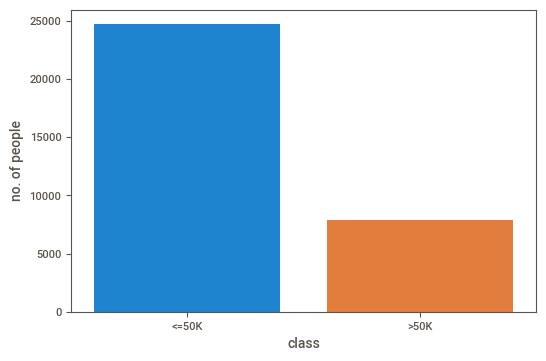

In [14]:
income=data["income"].value_counts()
sns.barplot(x=income.index,y=income.values)
plt.xlabel("class")
plt.ylabel("no. of people")

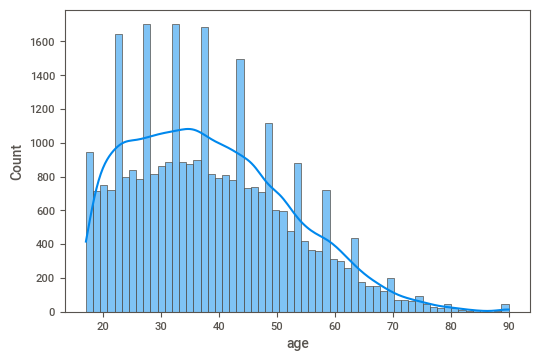

In [15]:
sns.histplot(x=data['age'],kde=True)

In [16]:
data.age.skew()

0.5587433694130483

In [17]:
data.workclass.unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [18]:
data.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [19]:
data.fnlwgt.skew()

1.4469800945789828

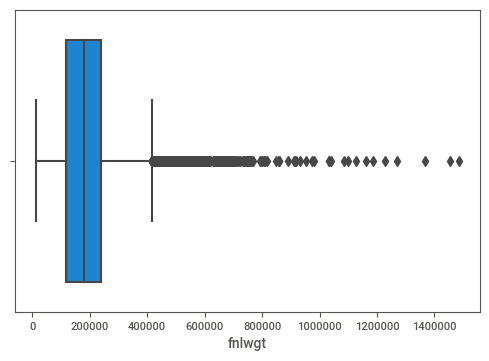

In [20]:
sns.boxplot(x=data["fnlwgt"])

In [21]:
q1=data['fnlwgt'].quantile(0.25)
q3=data['fnlwgt'].quantile(0.75)
iqr=q3-q1
lf=q1-1.5*iqr
uf=q3+1.5*iqr
ind1=data[data['fnlwgt']<lf].index
ind2=data[data['fnlwgt']>uf].index

In [22]:
data.drop(ind2,axis=0,inplace=True)

In [23]:
data.shape


(31569, 15)

In [24]:
data.fnlwgt.skew()

0.4114384008149891

Text(0, 0.5, 'no. of people')

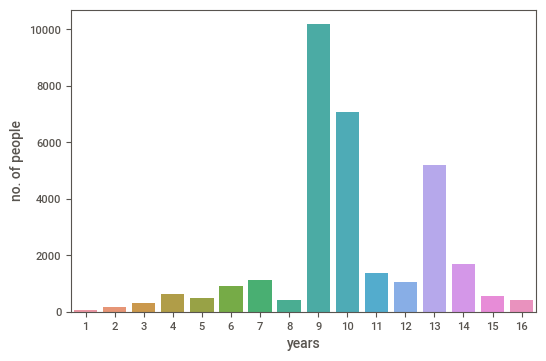

In [25]:
educn = data['education.num'].value_counts()

sns.barplot(x=educn.index,y=educn.values)
plt.xlabel("years")
plt.ylabel("no. of people")

In [26]:
data["education.num"].skew()

-0.3019495001919037

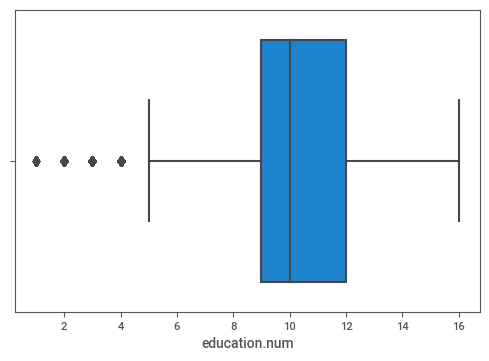

In [27]:
sns.boxplot(x=data["education.num"])

In [28]:
q1=data['education.num'].quantile(0.25)
q3=data['education.num'].quantile(0.75)
iqr=q3-q1
lf=q1-1.5*iqr
uf=q3+1.5*iqr
ind1=data[data['education.num']<lf].index
ind2=data[data['education.num']>uf].index

In [29]:
data.drop(ind1,axis=0,inplace=True)

In [30]:
data['education.num'].skew()

0.26948676703734126

In [31]:
data['marital.status'].value_counts()

Married-civ-spouse       13945
Never-married            10064
Divorced                  4223
Separated                  938
Widowed                    885
Married-spouse-absent      357
Married-AF-spouse           21
Name: marital.status, dtype: int64

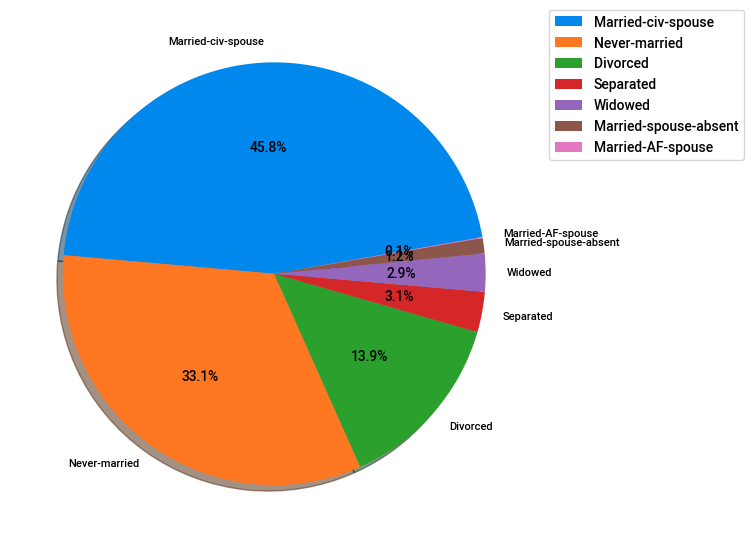

In [32]:
marital = data['marital.status'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, shadow=True, autopct='%1.1f%%')
plt.legend()
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [33]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [34]:
data.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.062251,0.109530,0.082924,0.059513,0.085331
fnlwgt,-0.062251,1.000000,-0.019848,0.002733,-0.001448,-0.017602
education.num,0.109530,-0.019848,1.000000,0.128486,0.088196,0.161760
capital.gain,0.082924,0.002733,0.128486,1.000000,-0.032402,0.077107
capital.loss,0.059513,-0.001448,0.088196,-0.032402,1.000000,0.054914
hours.per.week,0.085331,-0.017602,0.161760,0.077107,0.054914,1.000000


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['income'] = le.fit_transform(data['income'])

In [36]:
data.income.value_counts()

0    22861
1     7572
Name: income, dtype: int64

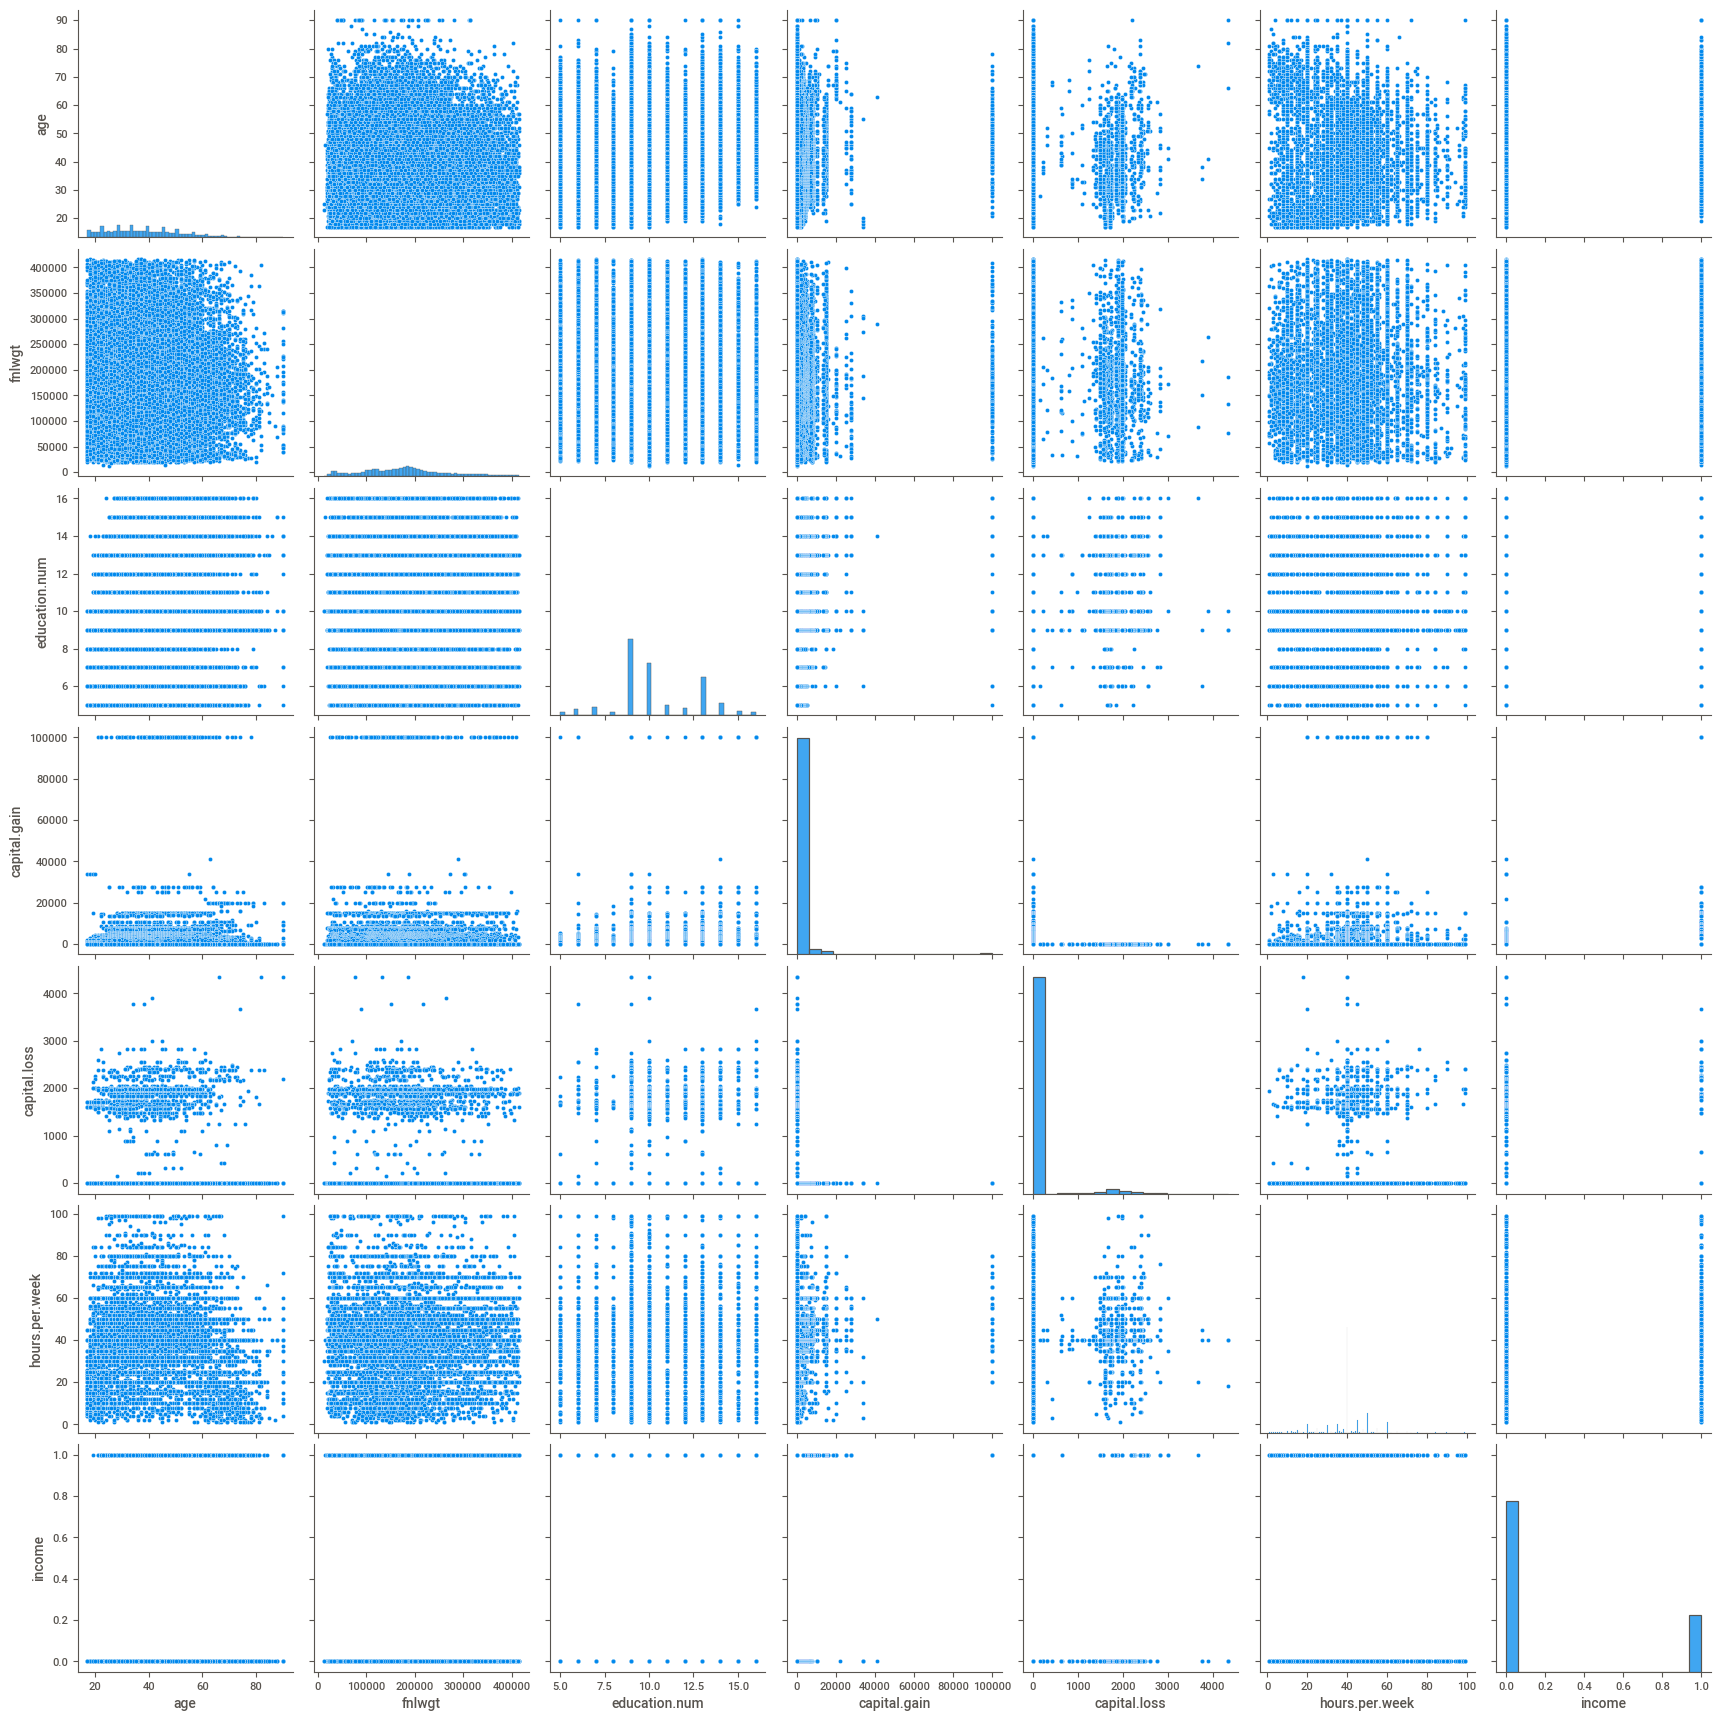

In [37]:
sns.pairplot(data=data)

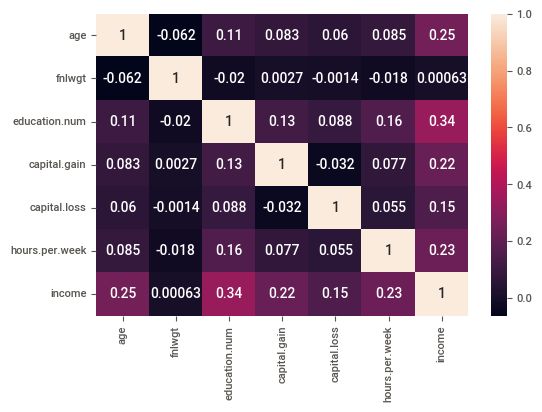

In [38]:
sns.heatmap(data.corr(),annot=True)

In [39]:
data = data.replace('?', np.nan)

In [40]:
data.isnull().sum()

age                  0
workclass         1664
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1669
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     527
income               0
dtype: int64

In [41]:
round((data.isnull().sum() / data.isnull().count()) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.47 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.48 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.73 %
income             0.0 %
dtype: object

In [42]:
null_columns = ['workclass', 'occupation', 'native.country']
for i in null_columns:
    data[i].fillna(data[i].mode()[0], inplace=True)

In [43]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [44]:
for columns in data.columns:
    if data[columns].dtypes == 'object':
        le = LabelEncoder()
        data[columns] = le.fit_transform(data[columns])

In [45]:
x = data.drop('income', axis=1)
y = data['income']

In [46]:
x = x.drop(['workclass', 'education', 'race', 'sex',
            'capital.loss', 'native.country'], axis=1)

In [47]:
from sklearn.preprocessing import StandardScaler
for col in x.columns:
    scaler = StandardScaler()
    x[col] = scaler.fit_transform(x[col].values.reshape(-1, 1))

In [48]:
x.head()

,age,fnlwgt,education.num,marital.status,occupation,relationship,capital.gain,hours.per.week
0,3.831475,-1.170247,-0.600998,2.254961,0.718189,-0.281728,-0.147824,-0.042127
1,3.237615,-0.530092,-0.600998,2.254961,-0.782439,-0.281728,-0.147824,-1.824770
2,2.049894,0.079946,-0.154624,2.254961,0.718189,1.582420,-0.147824,-0.042127
4,0.194081,0.981418,-0.154624,1.591017,0.718189,0.961037,-0.147824,-0.042127
5,-0.325547,0.433220,-0.600998,-1.728701,0.217980,1.582420,-0.147824,0.363019


In [49]:
from sklearn.utils import resample

In [50]:
data.income.value_counts()

0    22861
1     7572
Name: income, dtype: int64

In [51]:
data_majority=data[data['income']==0]
data_minority=data[data['income']==1]

In [52]:
numofmajority=data[data['income']==0]['income'].count()

In [53]:
numofmajority

22861

In [54]:
data_resampling=resample(data_minority,replace=True,n_samples=numofmajority)

In [55]:
data_combine=pd.concat([data_resampling,data_majority])

In [56]:
data_combine.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
545,46,3,265266,6,13,2,9,0,4,1,0,1902,40,38,1
1815,57,4,172654,10,15,2,13,0,4,1,15024,0,50,38,1
10293,54,4,124963,6,13,2,3,0,4,1,0,0,40,38,1
7875,36,3,63509,4,12,2,9,0,4,1,0,0,48,38,1
5674,64,3,168340,8,9,2,9,0,4,1,0,0,40,38,1


In [57]:
data_combine.income.value_counts()

1    22861
0    22861
Name: income, dtype: int64

In [58]:
x1 = data_combine.drop('income', axis=1)
y1 = data_combine['income']

In [59]:
x1 = x1.drop(['workclass', 'education', 'race', 'sex',
            'capital.loss', 'native.country'], axis=1)

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1,y1, test_size=0.2, random_state=42)

In [61]:
x_train.shape

(36577, 8)

In [62]:
x_test.shape

(9145, 8)

In [63]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [64]:
log.fit(x_train, y_train)

LogisticRegression()

In [65]:
y_pred_log = log.predict(x_test)

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred_log)

0.5880809185347184

In [67]:
confusion_matrix(y_test,y_pred_log)

array([[4382,  190],
       [3577,  996]])

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn=knn.predict(x_test)

In [69]:
confusion_matrix(y_test,y_pred_knn)

array([[2914, 1658],
       [ 803, 3770]])

In [70]:
accuracy_score(y_test,y_pred_knn)

0.7308911973756151

In [71]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier()

In [72]:
dec.fit(x_train, y_train)
y_pred_dec = dec.predict(x_test)

In [73]:
confusion_matrix(y_test,y_pred_dec)

array([[3869,  703],
       [ 168, 4405]])

In [74]:
accuracy_score(y_test,y_pred_knn)

0.7308911973756151

In [75]:
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier()
ran.fit(x_train, y_train)
y_pred_ran=ran.predict(x_test)

In [76]:
confusion_matrix(y_test,y_pred_ran)

array([[3981,  591],
       [ 129, 4444]])

In [77]:
accuracy_score(y_test,y_pred_ran)

0.9212684527063969

In [78]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred_svc=svc.predict(x_test)

In [79]:
confusion_matrix(y_test,y_pred_svc)

array([[4508,   64],
       [3626,  947]])

In [80]:
accuracy_score(y_test,y_pred_svc)

0.5965008201202843

In [82]:
#conclusion 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_ran))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      4572
           1       0.88      0.97      0.93      4573

    accuracy                           0.92      9145
   macro avg       0.93      0.92      0.92      9145
weighted avg       0.93      0.92      0.92      9145

